In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [2]:
df = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [4]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

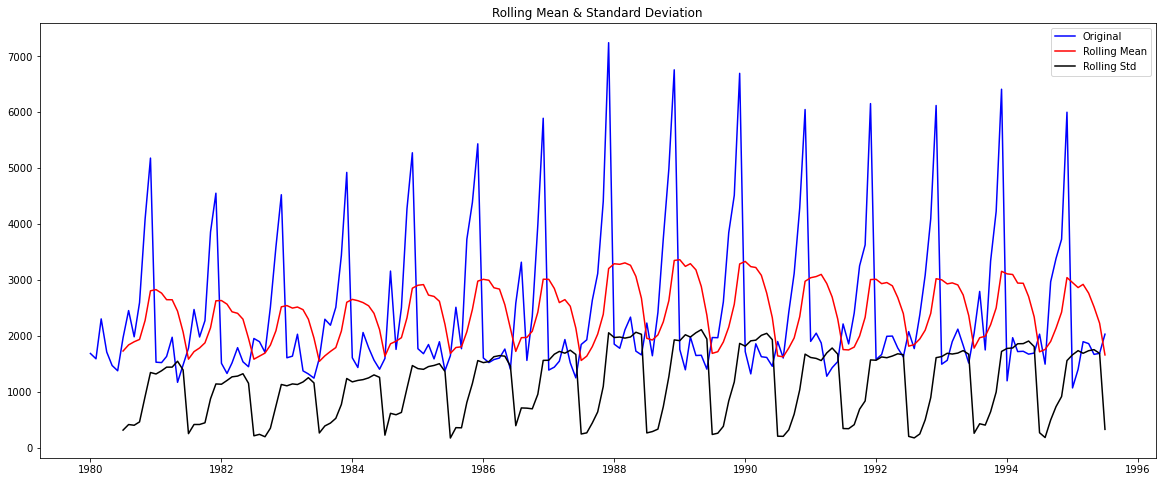

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [5]:
test_stationarity(df['Sparkling'])

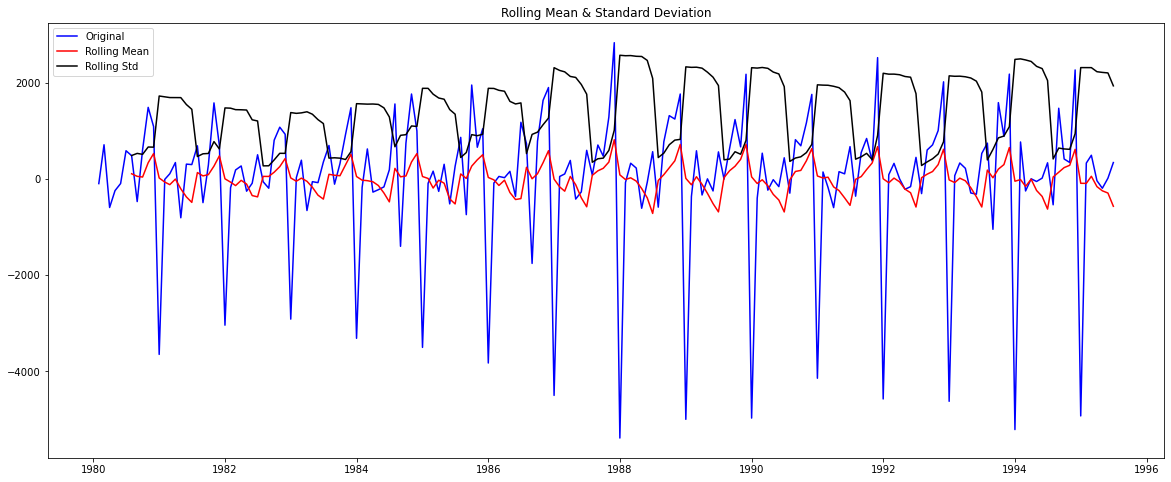

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [6]:
test_stationarity(df['Sparkling'].diff().dropna())

In [7]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

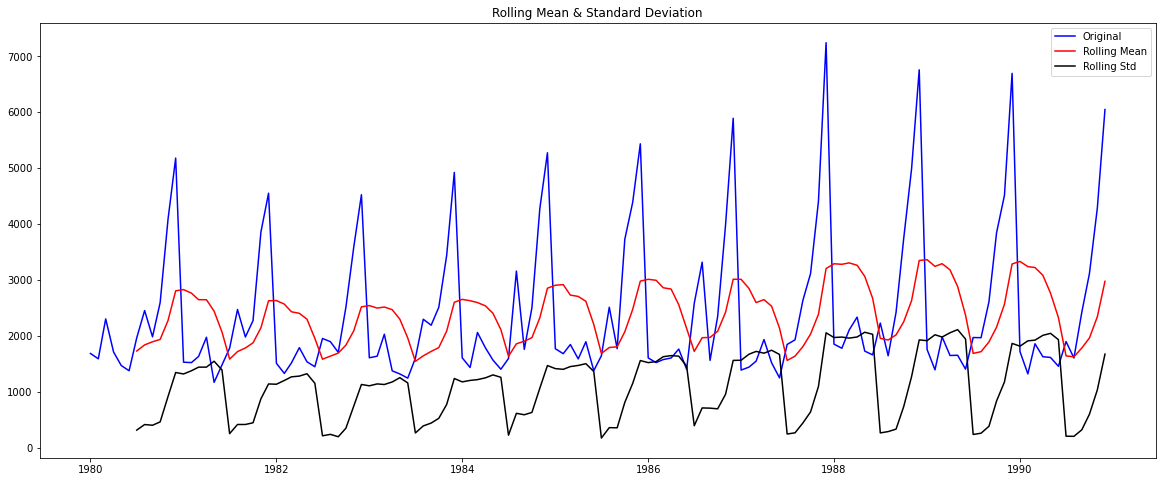

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [8]:
test_stationarity(train['Sparkling'])

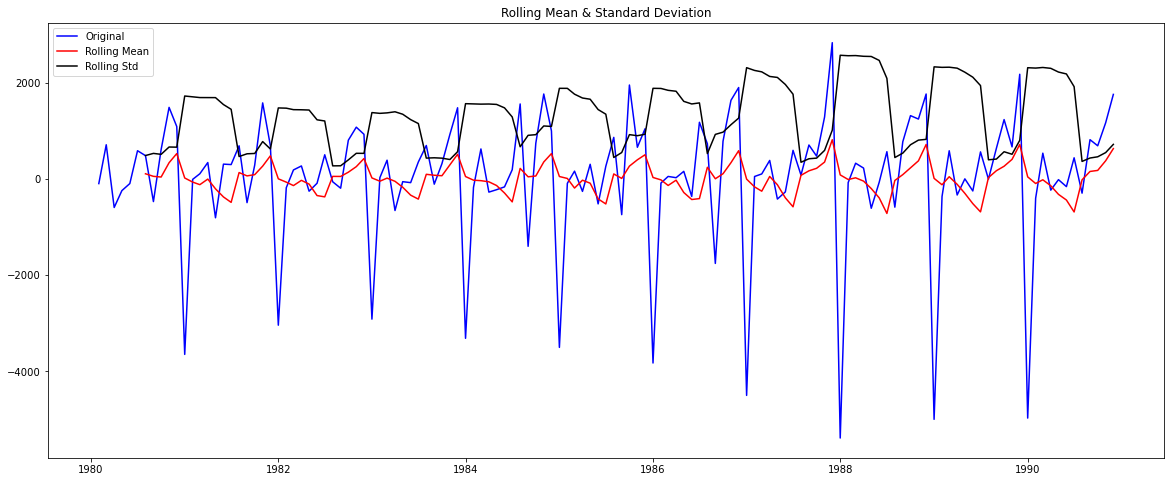

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [9]:
test_stationarity(train['Sparkling'].diff().dropna())

In [10]:
import itertools
p = q = range(0, 4) #p=0,1,2,3=q
d= range(1,2) #d=1
pdq = list(itertools.product(p, d, q))

In [11]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592223
ARIMA(0, 1, 2) - AIC:2234.4083231226628
ARIMA(0, 1, 3) - AIC:2233.994857735581
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.527200452125


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC:2235.6078154783027
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626228905
ARIMA(2, 1, 2) - AIC:2213.509212416925


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.8112113956195
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.4988992974854


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.825008517658
ARIMA(3, 1, 3) - AIC:2221.4616892285576


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.461689
14,"(3, 1, 2)",2230.825009
11,"(2, 1, 3)",2232.811211
9,"(2, 1, 1)",2233.777626
3,"(0, 1, 3)",2233.994858
2,"(0, 1, 2)",2234.408323
6,"(1, 1, 2)",2234.527200
13,"(3, 1, 1)",2235.498899
7,"(1, 1, 3)",2235.607815


In [13]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 08 Jan 2022   AIC                           2213.509
Time:                        20:43:01   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

## Predict on the Test Set using this model and evaluate the model.

In [14]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [15]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9798208324635


In [16]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.979821


In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:994: FutureWarning: ywunbiased has been renamed ywadjusted. After release 0.13, using the old name will raise.
  warnings.warn(
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


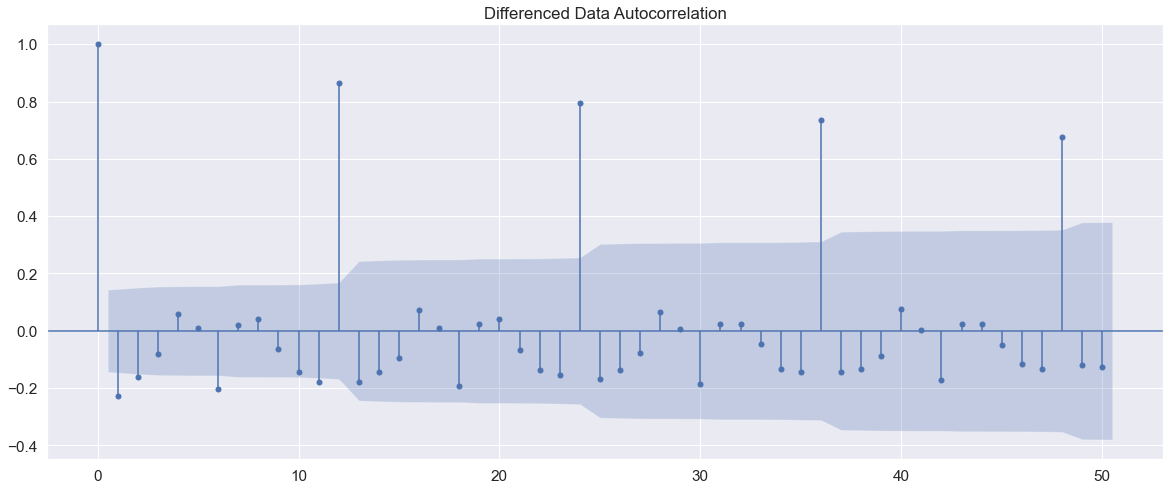

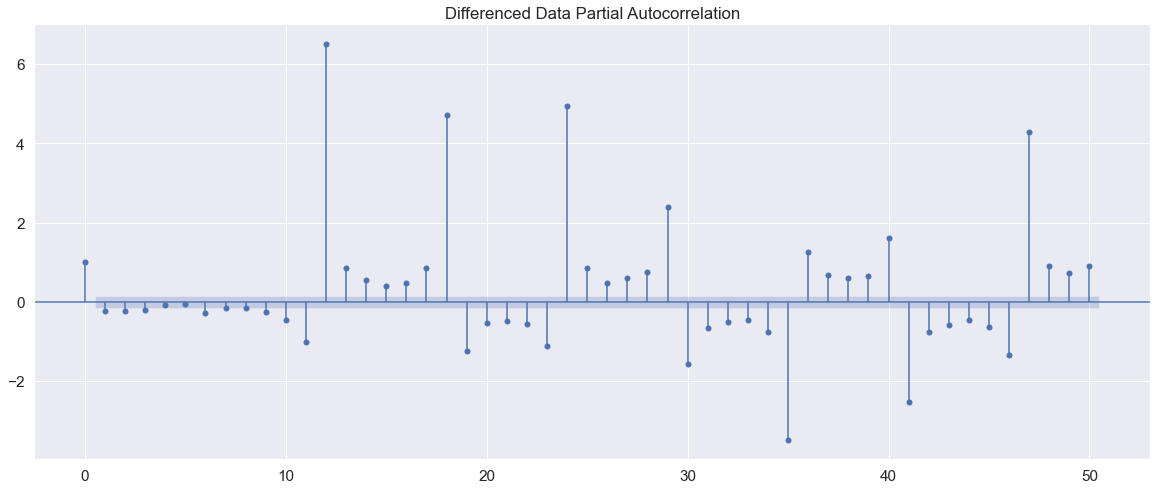

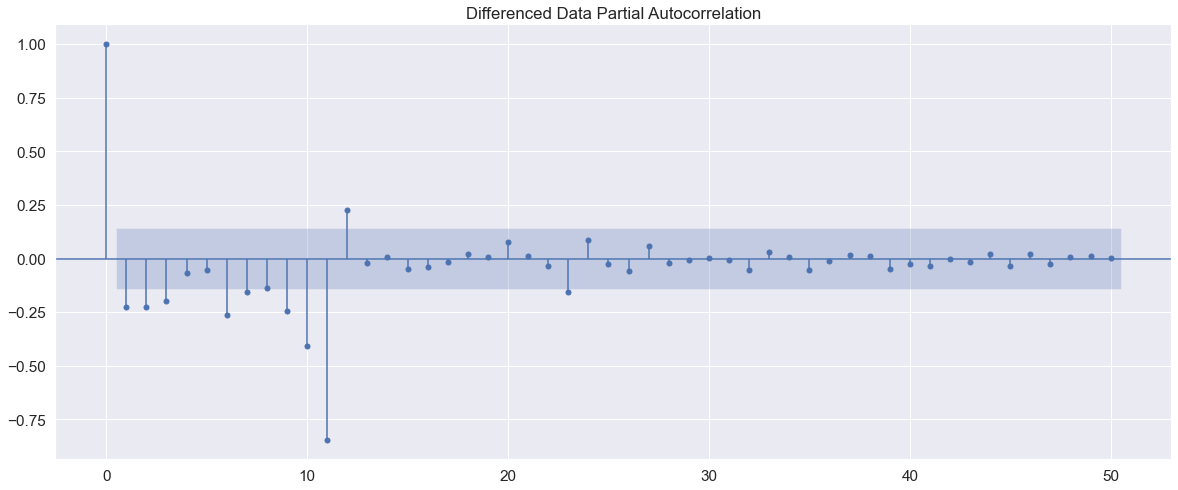

In [18]:
sns.set(font_scale=1.4)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method='ywunbiased')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation',method='ywmle')
plt.show()
sns.set(font_scale=1.0)

In [19]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.413
Date:                Sat, 08 Jan 2022   AIC                           2230.825
Time:                        20:43:01   BIC                           2248.076
Sample:                    01-01-1980   HQIC                          2237.835
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4294      0.045     -9.614      0.000      -0.517      -0.342
ar.L2          0.3341      0.103      3.242      0.001       0.132       0.536
ar.L3         -0.2365      0.058     -4.046      0.0

## Predict on the Test Set using this model and evaluate the model.

In [20]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [21]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print(rmse)

1277.4460769034908


In [22]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.979821
"ARIMA(3,1,2)",1277.446077


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

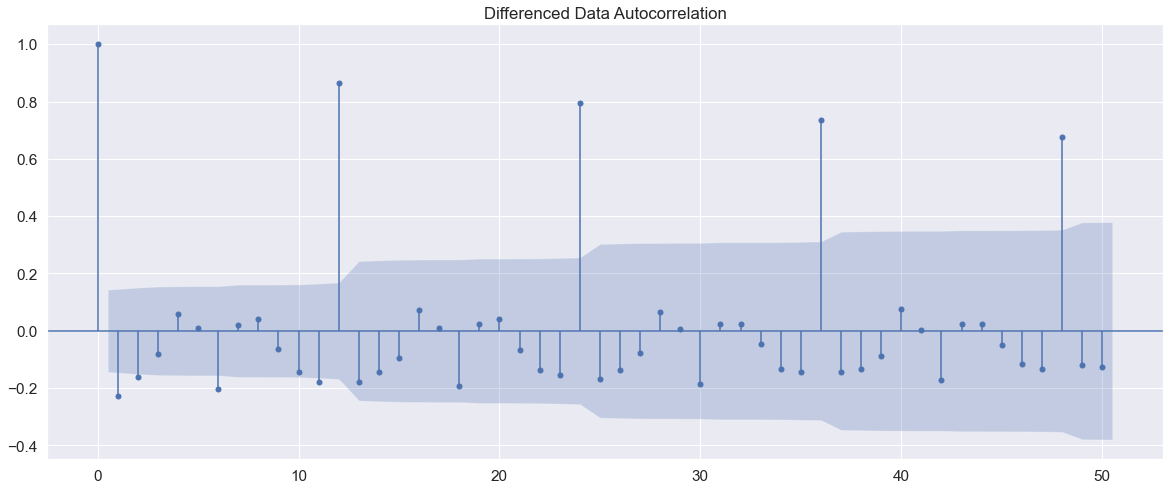

In [23]:
sns.set(font_scale=1.4)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()
sns.set(font_scale=1.0)

In [24]:
import itertools
p = q = range(0, 4)
d= range(1,2) #d=1
D = range(0,2) #D=0,1
#P=Q=range(0,3)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))] #P,D,Q
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)


In [25]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [26]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684592
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234275
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3788.8702234504462
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678277
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.677357426062


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:2983.0860020053024
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389272
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791694


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3102.146459235806
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.324390818717
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307973


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3506.24724401915
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415860455
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.98980539208


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2633.1403461999307
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866647
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.991155363833


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:3216.1155620861928
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625374
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064632


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:6506.405021012982
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.2448875094224
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1288.6070380307144


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:4044.235035860039
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850582
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566421
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572968055


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3446.263783179349
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828457
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234229967
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846680508


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:2923.4389742426583
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838273
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193763033
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144283382
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3449.208102198681
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.859481902387
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.855025919579
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.6709524137211


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:3568.0882072947347
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178712
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085449217
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.401882842353


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:5411.335971909487
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.244881115508
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027963313
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.6385888474351


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:3593.29021993928
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.460767961618
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727996569673
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.58892677946


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:6757.580984629763
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:1255.578454293161
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:1257.455856859062
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:1258.2925125564814


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3672.995109990017
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687527
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201373
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789891716817


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3608.879428475703
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1741.3207220431727
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:1554.7429039622357
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.4842540786353
SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:3142.014156225644
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332312022
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675070991748
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068883655


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3763.140576123555
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.7587293001154
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.155971616442
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.3988672020057
SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:3186.0730361012993
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774455566
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543882324784
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.121563157143


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:97.32576086530659
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773414538965
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.5534767508957
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:1386.0237342779255


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:3060.3190388776566
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407921233
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448370882657
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883835049841
SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:6684.6434005761585
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:1254.6525579264649
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:1256.9866634018992
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:1257.4253258676124
SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:3285.7013294974877
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408440266
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770693815249
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973663132448
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3488.890655448558
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1727.2607378275302
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:1540.794818431293
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:1369.9603671034645
SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:2564.6766360152665
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0301790973087
SARIMA(0, 1,

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3310.023440490174
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:1602.1924100607864
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:1542.6814540458133
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:1371.7363271382242


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:3474.4320205004897
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580749472
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674826698942
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.048623084692


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:5337.879658048997
SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:1428.389685687739
SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:1429.8265181294373
SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:1373.452473175466


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:3603.8598037518727
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529470066337
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435177037645
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.041517634766


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:4792.492205700524
SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:1256.0020281098848
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:1258.074761357641
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:1258.9452629339944


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:3249.543170655801
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990429
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354565


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3819.916998010865
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.740703341053
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1441.4259994233964
SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:3241.608239941446
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.244027933163
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359450557
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402563318


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3410.8071456238863
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1619.6703363510771
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1615.7404485275945
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:1443.1035528175214


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:3231.6011838786
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128908
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132636154
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067498257
SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:6906.461698984744
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:1440.574162809936
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:1442.5059371251305
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:1444.4274245939505


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:3981.2051403240894
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.513464035906
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780456383
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660401754947
SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:6830.324045025012
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:1265.1747644704728
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:1267.1592027274555
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:1263.9849693923586


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:4060.014371641154
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154564
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974130328
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352620624
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3668.1524369695253
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1757.3654162744572
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366812814
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:1398.7561672216966


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:3155.16936923868
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424470454335
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7120332231566
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863613458


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:14.0
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1588.0655672689488
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1570.6724644580804
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1400.4523886152124


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:3278.0815593667244
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160687877
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.314223602769
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968338948
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:762.5881272265765
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1413.567985961516
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.8736681604414
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1402.2732672815557


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3276.3949096057686
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112082534857
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502484748114
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.014906750192


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2776.6575954974087
SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:1240.8275546143507
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:1242.6640988862341
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:1243.1145005378587


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:3095.8329823228796
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450505316
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.770830749747
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.629142144302
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3340.482381478013
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1742.7366275438228
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.9584139022031
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800329856
SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:3160.5060823968315
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259802081927
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871795184658
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842467955563
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:2978.3784732669355
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.7860900921396
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.1300441713283
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1384.137873862399


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:3122.7538686890616
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216932039863
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1588.3226223496508
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1556.076771105998


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:18.0
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.9924109673505
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1413.5918294292533
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1385.6887207714424


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3155.739075486991
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102394792497
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146974725286
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9983601260512


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:1753.661988427322
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:1240.4397939412343
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:1242.3340377999677
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:1242.9811910743986


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:3257.453078233203
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264039778062
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.938150687233
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5217645823002


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3554.475054062371
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1727.0466394219518
SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:1541.6027947004654
SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:1370.6605716693678
SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:5734.038357304491
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596428409
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.955491419717
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744598935619


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3334.2056516577063
SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:1587.782481939768
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:1544.6047622976587
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:1372.2143069547587
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:6121.873232077235
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4154052138383
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3669040433742
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292693560897


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:917.9324231260896
SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:1413.9496333280165
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:1415.5604694480285
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:1373.71530161806
SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:6137.71539745384
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723333723507
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509686989736
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649247123563
SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:22.0
SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:1242.8330948723255
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:1244.822746770223
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:1245.4466245502456
SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:5044.888027354982
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435407906
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039814451


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4352.438761088168
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1779.6359486658962
SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:1599.8657465662257
SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:1429.602321491033


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:3175.163412409626
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066060363
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349663399
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204835598
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3350.3056926055147
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:1590.6714007730457
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1587.5144246574623
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:1431.1873135881306


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:3235.115449035695
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464844328
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344988118321
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191790344573


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:6798.180429438063
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:1413.6736725425565
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:1415.6324295193058
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:1417.3668472985332


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:3331.978366852566
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.944972803059
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017620365355
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975674173393
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:6754.873131916587
SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:1240.891751219928
SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:1242.8745815841291
SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:1242.799170336969


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:3365.904923628756
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131455163
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496025843
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408032839


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3308.1342447433035
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1758.5616376866571
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:1570.1755922610753
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:1400.209858180731


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:3178.719478659194
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429034113
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125436165
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888279308175


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3594.617162306464
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.3724067255678
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577388007504
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1401.9104199707435


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:3472.572029701604
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896922
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1596300826325
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342867514582
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:6905.0723913488355
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854069823728
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.9924735487061
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.818345552987
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3341.749596947907
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673327192704
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.130756763638
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241452520028


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:4509.165141279203
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:1228.3132766082683
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:1230.1483342056858
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:1230.759782203476


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3410.1336029626477
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114771516
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372608758158
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432488512


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3698.0127624229713
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1742.2930711386323
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.9467324125885
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.317618064532


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:2011.4123387716438
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140935579478
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.3767693060447
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404017838243


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2060.2986845540727
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644412323
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200892478819
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.097242019365


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:2791.4227847186658
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1599.9010784492957
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476005641451
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401586612067


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:20.0
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.775633999168
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1401.1832161217526
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1387.6277846296102


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:2292.247741641267
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376150605267
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5036127016476
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4359759753154
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:6688.300384993457
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:1228.3971677411384
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:1230.2093707076735
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:1230.685681954404


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:2858.1477993904946
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395885242024
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.057322460649
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072842413427
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3798.4046618402176
SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1729.008041502327
SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:1539.8879476659451
SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:1368.1431625257144
SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:6017.7761311106515
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1759.045735131789
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1713.8648805048429
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5288459924948


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:2955.5162877378734
SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:1571.5669140672478
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:1541.4636033632942
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:1369.7747273239574


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:5727.53524188879
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6943736795815
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1573.7793379683308
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9471480476075


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:1396.0596575331888
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:1397.8640318215596
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:1369.133721585777
SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.789854018017
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.992292205852
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.2788326924863
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:6607.8136424635695
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:1229.4698529158402
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:1227.8251448504368
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:1229.1523500290814
SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:6226.233553159212
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418917
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.508992317143
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3879.0924234123413
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1761.4099815082702
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:1600.5023

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:2815.9126121721065
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703206
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783840837125
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471967386236


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3285.271016683126
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:1576.8309567177048
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:1574.5127601474126
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:1431.9534628515316


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:3305.0586947767065
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025569301
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812789888
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.68081982987
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:6921.783395987169
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:1398.5970048038416
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:1400.474080360001
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:1402.5527499414518


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:2942.664713445138
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.867862055817
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774715048866
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.307475987735
SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:6681.658088140153
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:1227.4630824824671
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:1229.4324419590412
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:1229.1153342159737


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:3019.9670120572227
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983400584
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690700826775
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.423405122954
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3879.490476702294
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1744.6939375469262
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:1572.0715279675157
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:1401.6807316913246


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:3180.1002226027804
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222518696487
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085043480892
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844996111297


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3907.306871753966
SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:1561.8477975464205
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:1559.6931631943903
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:1403.3936812920476


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:3131.759256593169
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505331538
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.295662583854
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.349818747683
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:6905.4251925735425
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:1385.8871646619727
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:1387.5203747556525
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:1389.4969785742253


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:3222.275896966417
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.788331371707
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814837567676
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959015497032
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:6681.609354091769
SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:1215.8987770406538
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:1217.7138947651492
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:1218.4160436476964


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:3135.1022932045644
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.31472715611
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.7804323669582
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255040248673


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:5786.708392671617
SARIMA(3, 1, 2)x(0, 1, 0, 12) - AIC:1744.1714487342167
SARIMA(3, 1, 2)x(0, 1, 1, 12) - AIC:1560.2179700535175
SARIMA(3, 1, 2)x(0, 1, 2, 12) - AIC:1385.8754542228266
SARIMA(3, 1, 2)x(0, 1, 3, 12) - AIC:3170.339316420005
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.963586595066
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.365040142282
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.3372577935645


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3338.109443707932
SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:1563.16829893937
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:1559.686357676285
SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:1387.712392656458


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:3259.271454452414
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.9501943827645
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894244078345
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.809164428267


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:22.0
SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:1387.8884447440023
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:1387.2131040908666
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:1389.2046663206404


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:3028.5271120564635
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1400.9247380867641
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.602611792299
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.701996655722


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2202.7942510960147
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:1216.859179586941
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:1218.9913842243425
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:1219.259978636781


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:2632.4933667808996
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542045894
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1876.931112329866
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829946913935


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3696.3286642631383
SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1730.9862392391883
SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:1541.428653714613
SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:1372.4124945480853
SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:3111.573113102669
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1755.7426296512904
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1715.7503603953535
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3969579607249


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:6394.62861513899
SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:1559.5315811505611
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:1543.6143132106913
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:1374.3118267266264


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:2785.9659964619154
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1565.9762937909345
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9915683279542
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1551.9130792649553


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:481.3287318610489
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:1383.022378795373
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:1384.8827197757355
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:1372.220898721302


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:2570.610425195075
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.4970044525373
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698614339145
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6926083859978


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:6604.554857375581
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:1213.2825431245524
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:1215.2133653845317
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:1216.4799844194285
SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:2847.5574034577135


C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
SARIMA_AIC.sort_values(by=['AIC'])

,param,seasonal,AIC
171,"(1, 1, 1)","(1, 0, 3, 12)",14.000000
211,"(1, 1, 2)","(2, 0, 3, 12)",18.000000
339,"(2, 1, 2)","(2, 0, 3, 12)",20.000000
375,"(2, 1, 3)","(2, 1, 3, 12)",22.000000
251,"(1, 1, 3)","(3, 0, 3, 12)",22.000000
...,...,...,...
155,"(1, 1, 0)","(3, 0, 3, 12)",6830.324045
307,"(2, 1, 1)","(2, 0, 3, 12)",6905.072391
435,"(3, 1, 1)","(2, 0, 3, 12)",6905.425193
147,"(1, 1, 0)","(2, 0, 3, 12)",6906.461699


In [28]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                                    Sat, 08 Jan 2022   AIC                             14.000
Time:                                            21:00:05   BIC                             31.728
Sample:                                                 0   HQIC                            21.158
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -4.0268         -0        inf      0

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


In [29]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=True)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\cools\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -712.757
Date:                                    Sat, 08 Jan 2022   AIC                           1439.513
Time:                                            21:00:06   BIC                           1457.242
Sample:                                                 0   HQIC                          1446.671
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1910      0.083      2.312      0

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


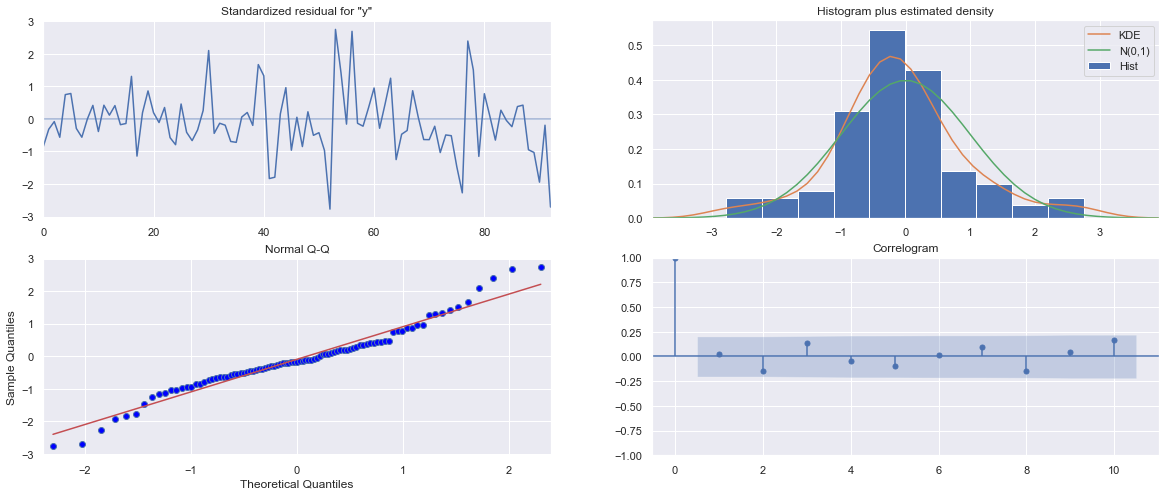

In [30]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [31]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [32]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1691.856055,466.471439,777.588835,2606.123275
1,1559.952270,476.235956,626.546947,2493.357593
2,2016.268401,476.775189,1081.806202,2950.730601
3,2222.946244,476.834031,1288.368716,3157.523771
4,1858.211704,476.844541,923.613578,2792.809829


In [33]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

610.8781420217439


In [34]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,1)(1,0,3,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.979821
"ARIMA(3,1,2)",1277.446077
"SARIMA(1,1,1)(1,0,3,12)",610.878142


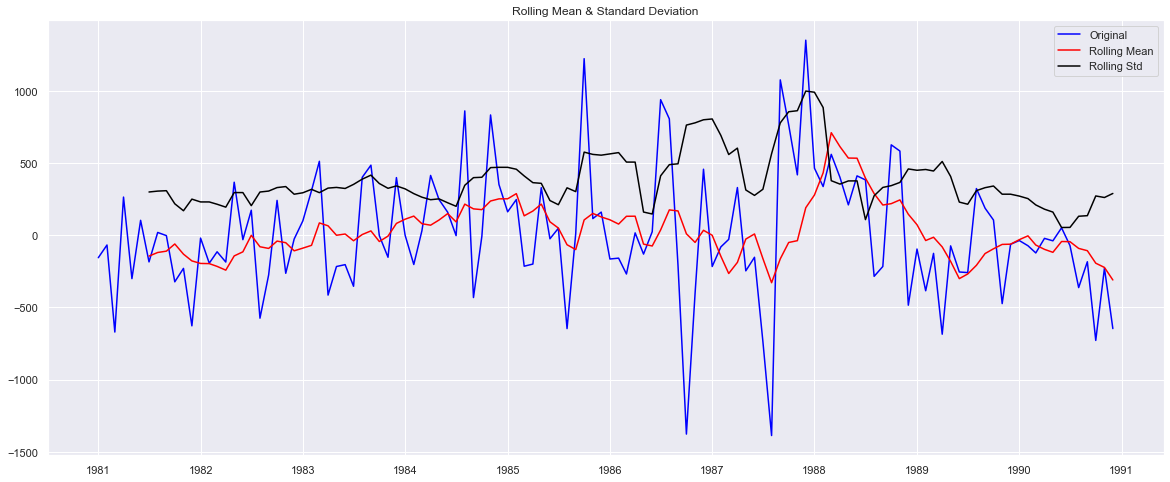

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [35]:
test_stationarity((train['Sparkling'].diff(12).dropna())) #D=0

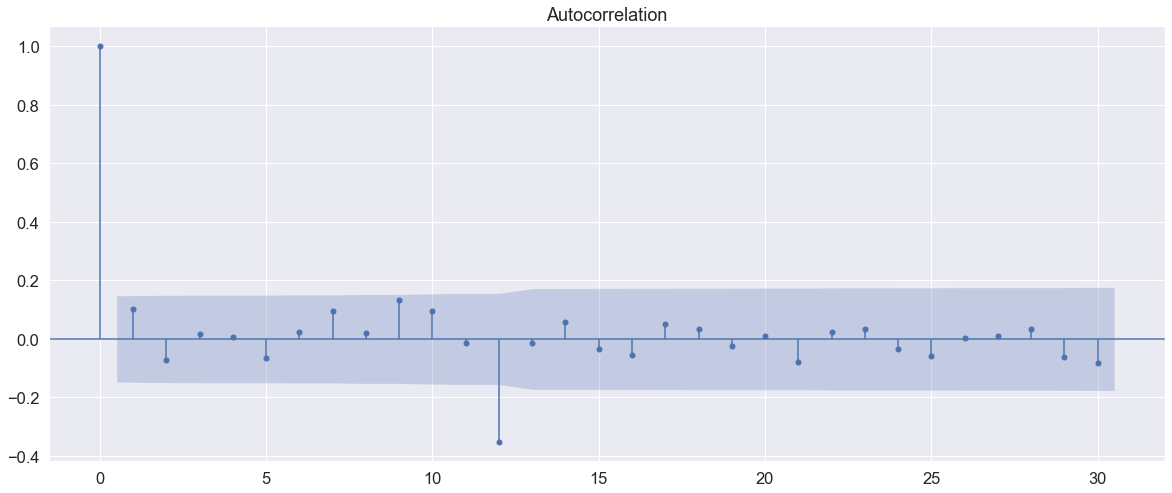

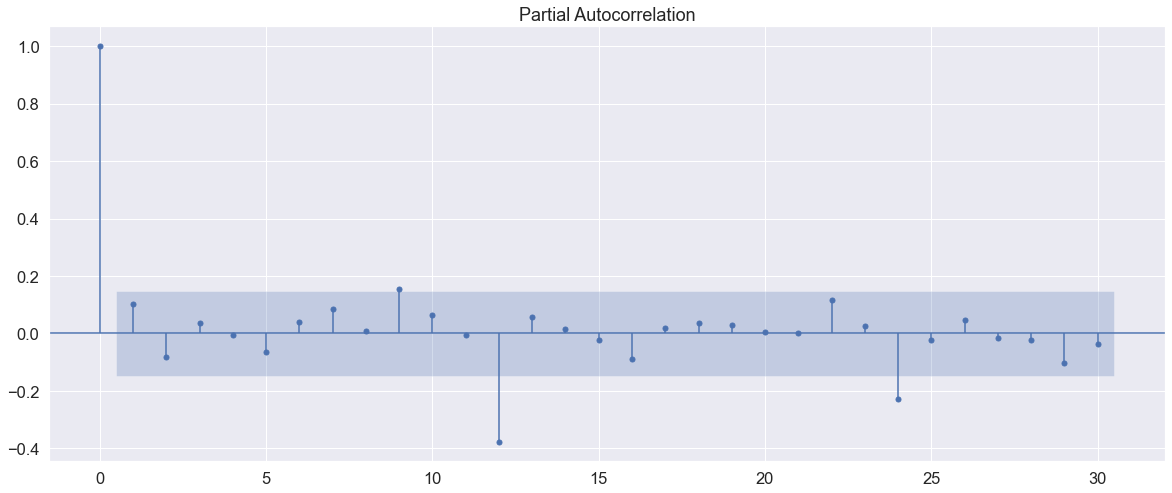

In [41]:
#D=0
sns.set(font_scale=1.5)
plot_acf((df['Sparkling'].diff(12).dropna()),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()),lags=30);
sns.set(font_scale=1.0)

In [43]:
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -1087.657
Date:                Sat, 08 Jan 2022   AIC                           2187.315
Time:                        21:13:20   BIC                           2204.427
Sample:                             0   HQIC                          2194.267
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4328      0.210     -2.066      0.039      -0.843      -0.022
ar.L2          0.3206      0.167      1.926      0.054      -0.006       0.647
ar.L3         -0.2487      0.258     -0.964      0.3

C:\Users\cools\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


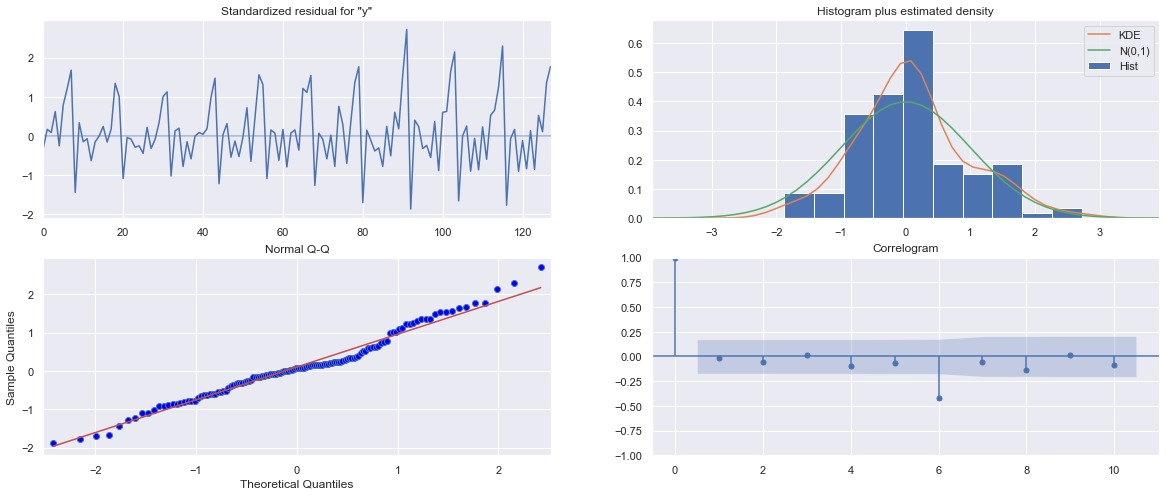

In [44]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [45]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [46]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,3769.532759,1330.849866,1161.114952,6377.950566
1,2745.173199,1537.441017,-268.155822,5758.502220
2,2020.267501,1544.907579,-1007.695714,5048.230715
3,2572.087985,1547.606610,-461.165232,5605.341202
4,2355.645396,1548.248212,-678.865338,5390.156131


In [48]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

1282.4983863538685


In [49]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,1)(0,0,0,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.979821
"ARIMA(3,1,2)",1277.446077
"SARIMA(1,1,1)(1,0,3,12)",610.878142
"SARIMA(0,1,0)(2,0,1,6)",1282.498386
